In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder


In [154]:
data = pd.read_csv(r"C:\Users\chris\Downloads\hospital_readmissions - hospital_readmissions.csv")

In [5]:
data.head(7)


,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no
5,[40-50),2,51,0,10,0,0,0,Missing,Other,Other,Other,no,no,no,no,yes
6,[50-60),4,44,2,21,0,0,0,Missing,Injury,Other,Other,no,normal,yes,yes,no


In [160]:

cols = ['diag_1', 'diag_2', 'diag_3','A1Ctest']
for i in cols:
    print(i)
    print(data[i].unique())



diag_1
['Circulatory' 'Other' 'Injury' 'Digestive' 'Respiratory' 'Diabetes'
 'Musculoskeletal' 'Missing']
diag_2
['Respiratory' 'Other' 'Circulatory' 'Injury' 'Diabetes' 'Digestive'
 'Musculoskeletal' 'Missing']
diag_3
['Other' 'Circulatory' 'Diabetes' 'Respiratory' 'Injury' 'Musculoskeletal'
 'Digestive' 'Missing']
A1Ctest
['no' 'normal' 'high']


In [158]:
textCols = ['glucose_test','A1Ctest','change','diabetes_med','readmitted']
for i in textCols:
    print(i)
    print(data[i].unique())

glucose_test
['no' 'normal' 'high']
A1Ctest
['no' 'normal' 'high']
change
['no' 'yes']
diabetes_med
['yes' 'no']
readmitted
['no' 'yes']


In [164]:
binaryCols = ['change','diabetes_med','readmitted']
for i in binaryCols:
    data[i] = data[i].apply(lambda x: 0 if x == 'no' else 1)

In [170]:
noNormalHighCols = ['glucose_test','A1Ctest']
le = LabelEncoder()
for i in noNormalHighCols:
    #df_all[i] = le.fit_transform(df_all[i])
    data[i+'_ind'] = data[i].apply(lambda x: 0 if x == 'no' else 1 if x == 'normal' else 2)

data['age_t'] = le.fit_transform(data['age'])

In [176]:
data

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted,glucose_test_ind,A1Ctest_ind,age_t
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,0,1,0,0,0,3
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,0,1,0,0,0,3
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,1,1,1,0,0,1
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,1,1,1,0,0,3
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,[80-90),14,77,1,30,0,0,0,Missing,Circulatory,Other,Circulatory,no,normal,0,0,1,0,1,4
24996,[80-90),2,66,0,24,0,0,0,Missing,Digestive,Injury,Other,no,high,1,1,1,0,2,4
24997,[70-80),5,12,0,6,0,1,0,Missing,Other,Other,Other,normal,no,0,0,1,1,0,3
24998,[70-80),2,61,3,15,0,0,0,Family/GeneralPractice,Respiratory,Diabetes,Other,no,no,1,1,0,0,0,3


In [172]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
# assume 'data' is a pandas Series or DataFrame with categorical data

le = LabelEncoder()
data_encoded = le.fit_transform(data['diag_1'])

In [174]:
data_encoded


array([0, 6, 0, ..., 6, 7, 6])

In [206]:
#checking for null values
data.isnull().sum()

age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64

In [208]:
data.shape

(25000, 17)

In [210]:
data.dtypes

age                  object
time_in_hospital      int64
n_lab_procedures      int64
n_procedures          int64
n_medications         int64
n_outpatient          int64
n_inpatient           int64
n_emergency           int64
medical_specialty    object
diag_1               object
diag_2               object
diag_3               object
glucose_test         object
A1Ctest              object
change               object
diabetes_med         object
readmitted           object
dtype: object

In [178]:
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_columns = ['age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 
                        'glucose_test', 'A1Ctest', 'change', 'diabetes_med', 'readmitted']

# Apply Label Encoding to categorical columns only
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

print("Label Encoded DataFrame:")
print(data)

Label Encoded DataFrame:
       age  time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
0        3                 8                72             1             18   
1        3                 3                34             2             13   
2        1                 5                45             0             18   
3        3                 2                36             0             12   
4        2                 1                42             0              7   
...    ...               ...               ...           ...            ...   
24995    4                14                77             1             30   
24996    4                 2                66             0             24   
24997    3                 5                12             0              6   
24998    3                 2                61             3             15   
24999    1                10                37             1             24   

       n_outpatient  n_inp

In [180]:
from sklearn.model_selection import train_test_split
#X = data[data.columns[:-1]]
X = data['diag_1'] + data['diag_2'] + data['diag_3'] 
Y = data['readmitted']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [182]:
X_train.shape, x_test.shape, Y_train.shape, y_test.shape

((20000,), (5000,), (20000,), (5000,))

In [186]:
data

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted,glucose_test_ind,A1Ctest_ind,age_t
0,3,8,72,1,18,2,0,0,4,0,7,6,1,1,0,1,0,0,0,3
1,3,3,34,2,13,0,0,0,5,6,6,6,1,1,0,1,0,0,0,3
2,1,5,45,0,18,0,0,0,4,0,0,0,1,1,1,1,1,0,0,1
3,3,2,36,0,12,1,0,0,4,0,6,1,1,1,1,1,1,0,0,3
4,2,1,42,0,7,0,0,0,3,6,0,7,1,1,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,4,14,77,1,30,0,0,0,4,0,6,0,1,2,0,0,1,0,1,4
24996,4,2,66,0,24,0,0,0,4,2,3,6,1,0,1,1,1,0,2,4
24997,3,5,12,0,6,0,1,0,4,6,6,6,2,1,0,0,1,1,0,3
24998,3,2,61,3,15,0,0,0,2,7,1,6,1,1,1,1,0,0,0,3


In [188]:

data.dtypes

age                  int32
time_in_hospital     int64
n_lab_procedures     int64
n_procedures         int64
n_medications        int64
n_outpatient         int64
n_inpatient          int64
n_emergency          int64
medical_specialty    int32
diag_1               int32
diag_2               int32
diag_3               int32
glucose_test         int32
A1Ctest              int32
change               int64
diabetes_med         int64
readmitted           int64
glucose_test_ind     int64
A1Ctest_ind          int64
age_t                int32
dtype: object

In [32]:
data.isnull().sum()

age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64

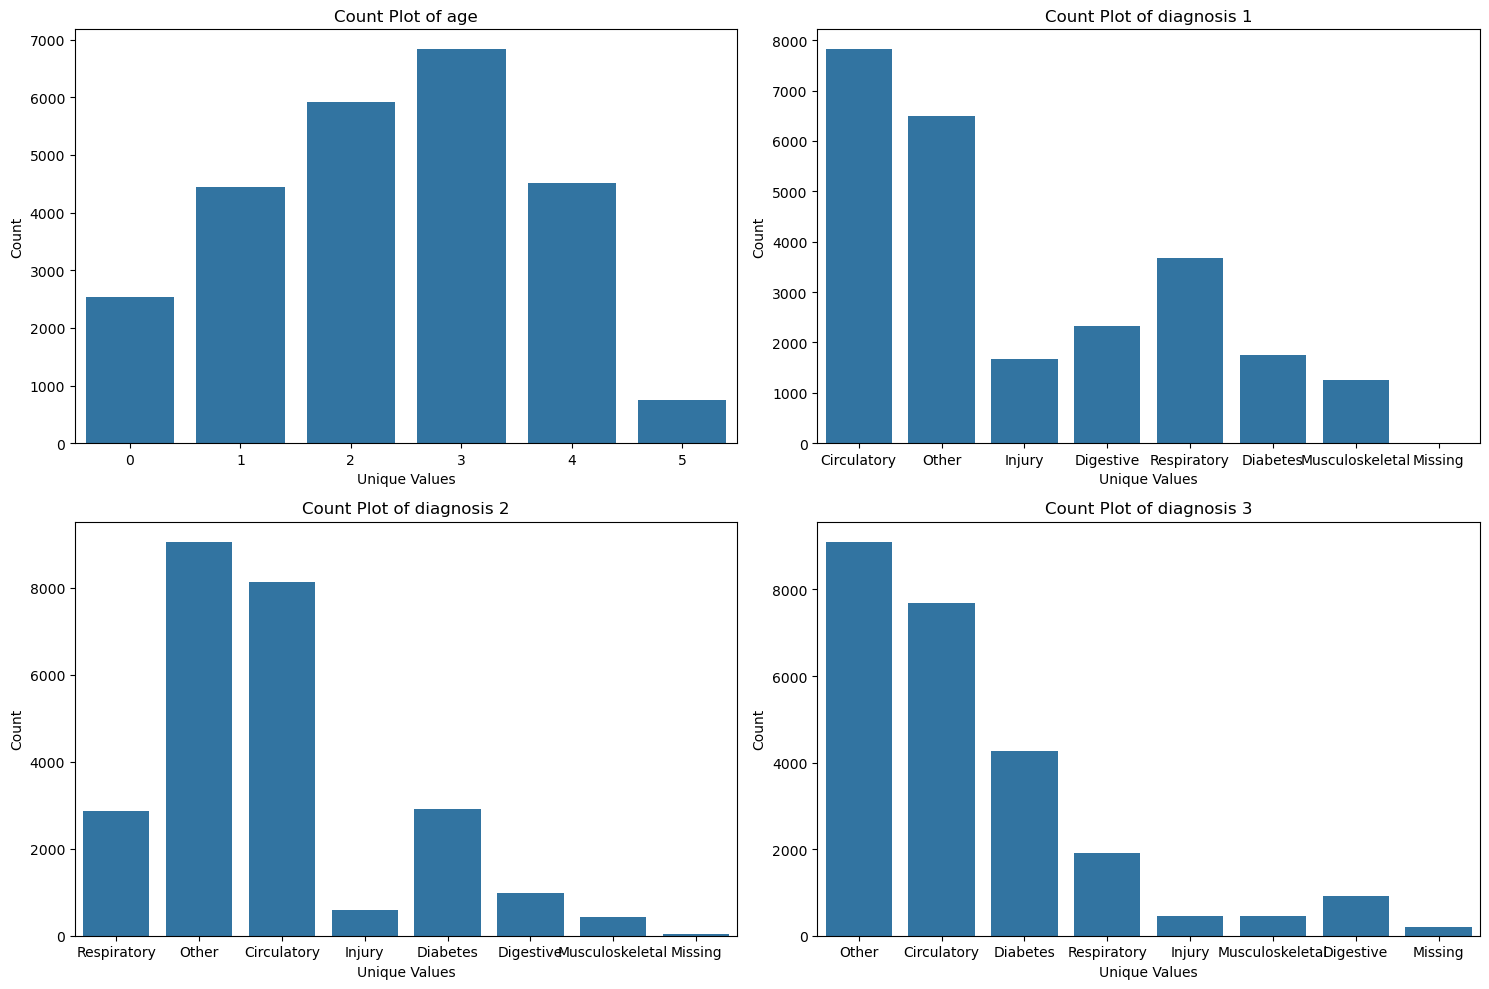

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# assuming your data is in a Pandas DataFrame called 'data'
# and the four columns you want to plot are called 'age', 'column_name2', 'column_name3', and 'column_name4'

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

sns.countplot(x='age', data=data, ax=axs[0, 0])
axs[0, 0].set_title('Count Plot of age')
axs[0, 0].set_xlabel('Unique Values')
axs[0, 0].set_ylabel('Count')

sns.countplot(x='diag_1', data=data, ax=axs[0, 1])
axs[0, 1].set_title('Count Plot of diagnosis 1')
axs[0, 1].set_xlabel('Unique Values')
axs[0, 1].set_ylabel('Count')

sns.countplot(x='diag_2', data=data, ax=axs[1, 0])
axs[1, 0].set_title('Count Plot of diagnosis 2')
axs[1, 0].set_xlabel('Unique Values')
axs[1, 0].set_ylabel('Count')

sns.countplot(x='diag_3', data=data, ax=axs[1, 1])
axs[1, 1].set_title('Count Plot of diagnosis 3')
axs[1, 1].set_xlabel('Unique Values')
axs[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
label_encoder = LabelEncoder()
for data in data["repeat_purchase"] = label_encoder.fit_transform(df["repeat_purchase"])

In [190]:
from sklearn.model_selection import train_test_split
X = data[data.columns[:-1]]
#X = data1['diag_1'] + data1['diag_2'] + data1['diag_3'] 
Y = data['readmitted']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [192]:
data.dropna(inplace=True)

In [194]:
vector1=TfidfVectorizer()
vector1.fit(X)
X=vector1.transform(X)
print(X)

  (0, 2)	1.0
  (1, 18)	1.0
  (2, 13)	1.0
  (3, 16)	1.0
  (4, 14)	1.0
  (5, 15)	1.0
  (6, 12)	1.0
  (7, 11)	1.0
  (8, 10)	1.0
  (9, 5)	1.0
  (10, 6)	1.0
  (11, 7)	1.0
  (12, 8)	1.0
  (13, 0)	1.0
  (14, 3)	1.0
  (15, 4)	1.0
  (16, 17)	1.0
  (17, 9)	1.0
  (18, 1)	1.0


In [196]:
model = LogisticRegression()
model.fit(X_train, Y_train)

C:\Users\chris\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [198]:
from sklearn.metrics import accuracy_score

In [200]:
train1 = model.predict(X_train)
acc = accuracy_score(train1, Y_train)
print("accuracy is ",acc)

accuracy is  1.0


In [224]:
row1 = data.iloc[[9,10,11]].corr()


In [226]:
row1


,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted,glucose_test_ind,A1Ctest_ind,age_t
age,1.000000,0.082199,-0.998625,0.500000,0.563621,NaN,NaN,NaN,0.000000,-0.500000,-0.277350,0.866025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
time_in_hospital,0.082199,1.000000,-0.029850,0.904194,0.869567,NaN,NaN,NaN,-0.996616,0.821995,0.934720,0.569495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.082199
n_lab_procedures,-0.998625,-0.029850,1.000000,-0.453921,-0.519551,NaN,NaN,NaN,-0.052414,0.544705,0.327327,-0.838628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.998625
n_procedures,0.500000,0.904194,-0.453921,1.000000,0.997176,NaN,NaN,NaN,-0.866025,0.500000,0.693375,0.866025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000
n_medications,0.563621,0.869567,-0.519551,0.997176,1.000000,NaN,NaN,NaN,-0.826033,0.433555,0.637307,0.901127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.563621
n_outpatient,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n_inpatient,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n_emergency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
medical_specialty,0.000000,-0.996616,-0.052414,-0.866025,-0.826033,NaN,NaN,NaN,1.000000,-0.866025,-0.960769,-0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
diag_1,-0.500000,0.821995,0.544705,0.500000,0.433555,NaN,NaN,NaN,-0.866025,1.000000,0.970725,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.500000


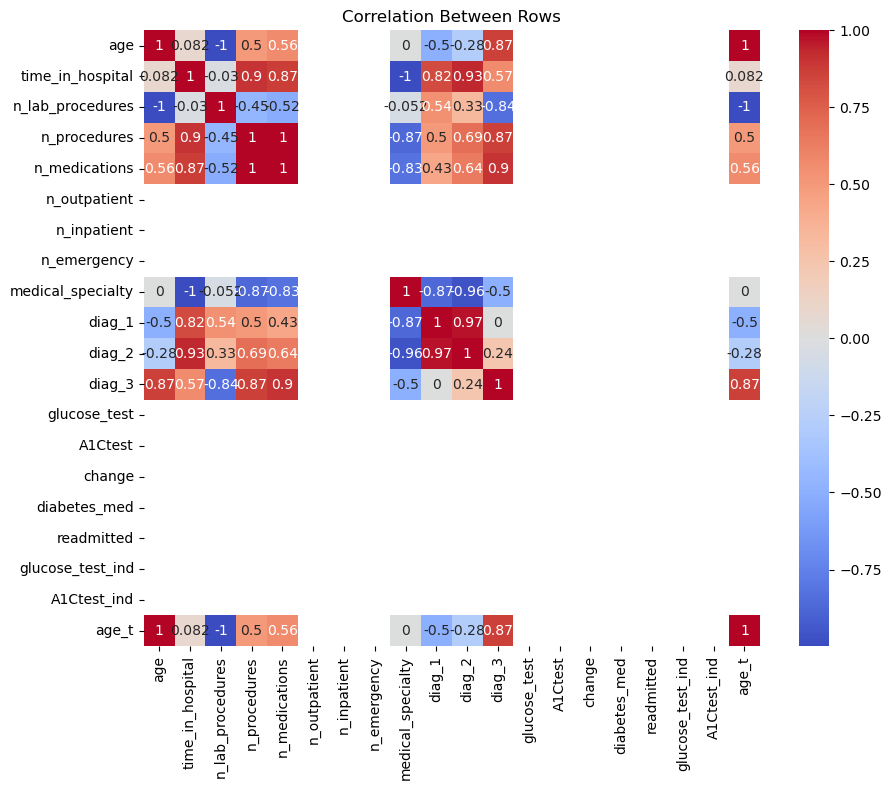

In [228]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



plt.figure(figsize=(10, 8))
sns.heatmap(row1, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Between Rows')
plt.show()

In [234]:
X_test

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted,glucose_test_ind,A1Ctest_ind
14149,3,1,17,1,5,0,4,2,5,7,6,6,2,1,0,0,1,1,0
8946,2,1,37,1,12,0,0,0,3,6,0,7,1,1,0,1,1,0,0
22378,4,4,43,3,15,1,0,0,4,2,7,1,1,1,0,1,1,0,0
12162,2,3,69,0,13,0,5,0,4,6,6,7,1,1,0,1,0,0,0
4879,4,5,58,0,11,0,1,0,4,6,6,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4022,1,1,41,2,15,0,1,0,0,7,0,6,1,1,1,1,0,0,0
17601,3,1,7,1,16,1,0,0,4,6,1,0,1,1,0,1,0,0,0
4718,0,4,35,3,21,0,0,0,2,6,6,1,1,1,1,1,1,0,0
9376,5,7,35,0,21,0,0,2,3,6,0,1,1,1,1,1,0,0,0


In [238]:
new=X_test[4999]
pre1=model.predict(new)
if(pre1[0]==0):
    print('readmission not needed')
else:
    print('readmission needed')

KeyError: 4999

In [246]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics



In [250]:
from sklearn.metrics import confusion_matrix
# Calculate confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot a labeled confusion matrix with Seaborn
sns.heatmap(cnf_matrix, annot=True, fmt="g")
plt.title("Confusion matrix")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

NameError: name 'y_pred' is not defined